In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [9]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas_datareader.data as web

In [4]:
from datetime import datetime

In [5]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [6]:
end=datetime.now()

start=datetime(end.year-1,end.month,end.day)

In [7]:
for stock in tech_list:
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

In [8]:
#data = web.DataReader(name="AAPL", data_source='yahoo', start=start,end=end)
#print(data)

In [9]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-19,130.710007,128.800003,130.240005,129.869995,87668800.0,129.102661
2021-02-22,129.720001,125.599998,128.009995,126.000000,103916400.0,125.255539
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.116371
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,124.609383
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.275139
...,...,...,...,...,...,...
2022-02-14,169.580002,166.559998,167.369995,168.880005,86062800.0,168.880005
2022-02-15,172.949997,170.250000,170.970001,172.789993,64286300.0,172.789993
2022-02-16,173.339996,170.050003,171.850006,172.550003,61177400.0,172.550003


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-02-19 to 2022-02-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


<AxesSubplot:xlabel='Date'>

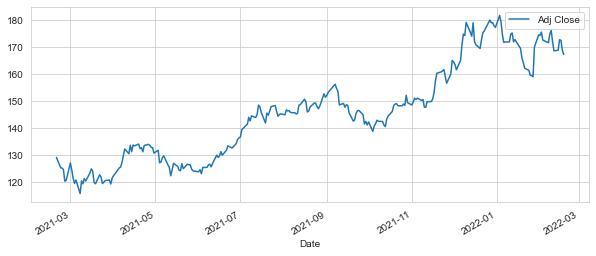

In [11]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

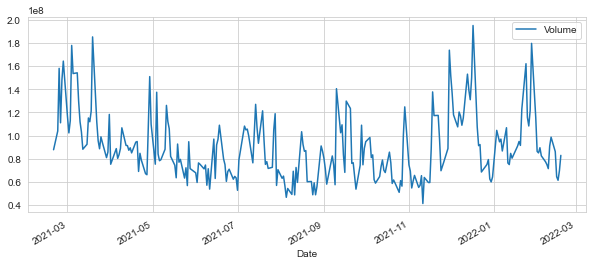

In [12]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))



In [17]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name='MA for %s days'%(str(ma))
    
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

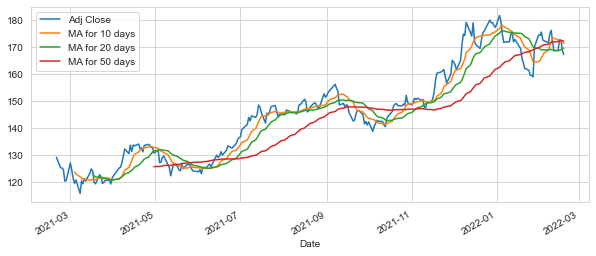

In [18]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

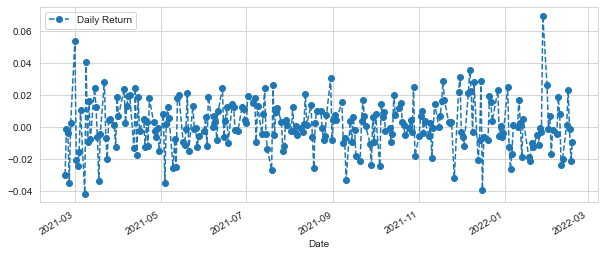

In [22]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

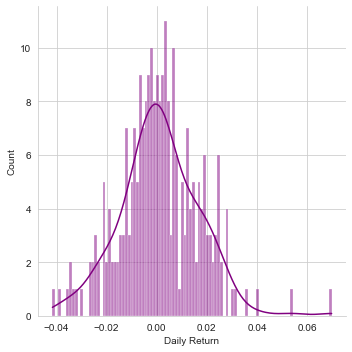

In [28]:
sns.displot(data=AAPL['Daily Return'].dropna(),bins=100,color='purple',kde=True
)

<AxesSubplot:>

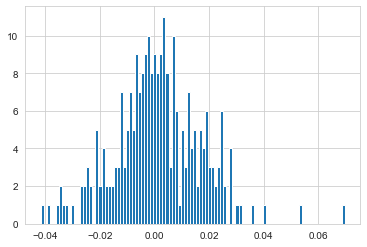

In [30]:
AAPL['Daily Return'].hist(bins=100)

In [36]:
closing_df=web.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [37]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-02-19,129.102676,2101.139893,239.023056,3249.899902
2021-02-22,125.255539,2064.879883,232.615250,3180.739990
2021-02-23,125.116371,2070.860107,231.385269,3194.500000
2021-02-24,124.609383,2095.169922,232.654938,3159.530029
2021-02-25,120.275139,2031.359985,227.139862,3057.159912
...,...,...,...,...
2022-02-14,168.880005,2706.000000,294.391296,3103.340088
2022-02-15,172.789993,2728.510010,299.850006,3130.209961
2022-02-16,172.550003,2749.750000,299.500000,3162.010010


In [38]:
tech_rets=closing_df.pct_change()

In [39]:
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-02-19,NaN,NaN,NaN,NaN
2021-02-22,-0.029799,-0.017257,-0.026808,-0.021281
2021-02-23,-0.001111,0.002896,-0.005288,0.004326
2021-02-24,-0.004052,0.011739,0.005487,-0.010947
2021-02-25,-0.034783,-0.030456,-0.023705,-0.032400
...,...,...,...,...
2022-02-14,0.001423,0.008723,-0.000136,0.012222
2022-02-15,0.023152,0.008319,0.018542,0.008658
2022-02-16,-0.001389,0.007784,-0.001167,0.010159


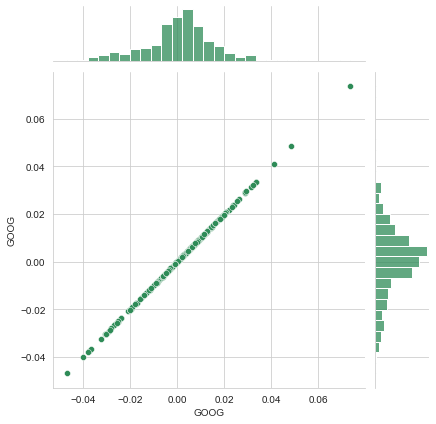

In [42]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

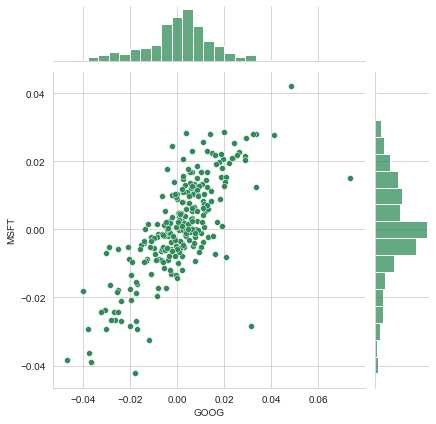

In [43]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter',color='seagreen')

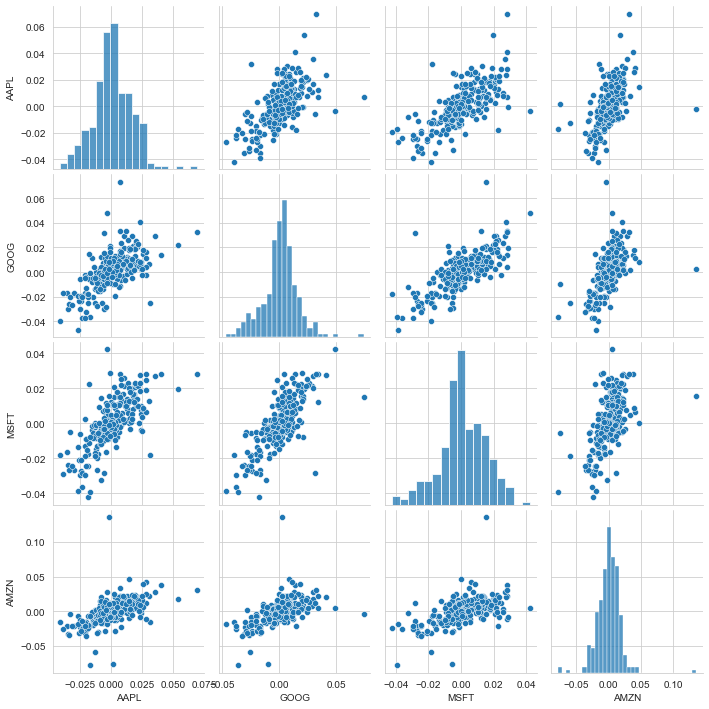

In [45]:
sns.pairplot(data=(tech_rets).dropna())

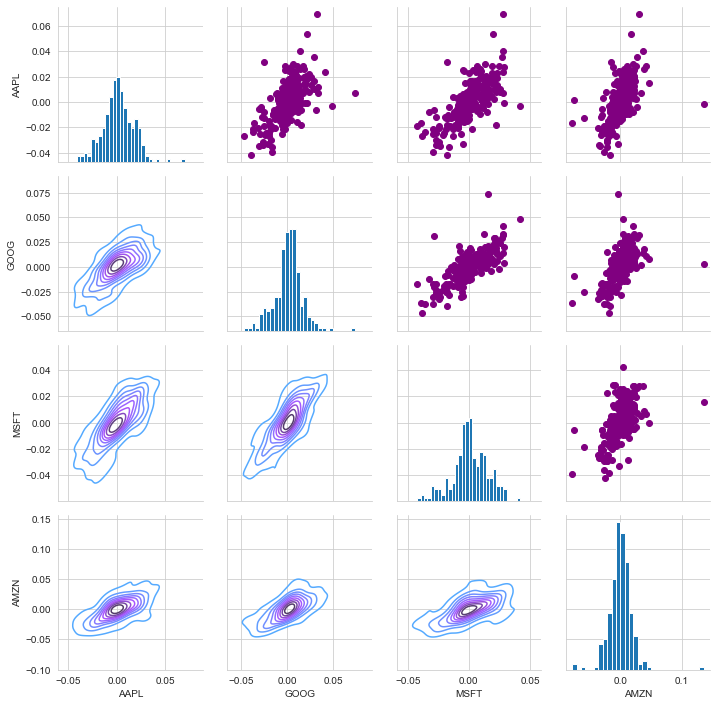

In [49]:
returns_fig=sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


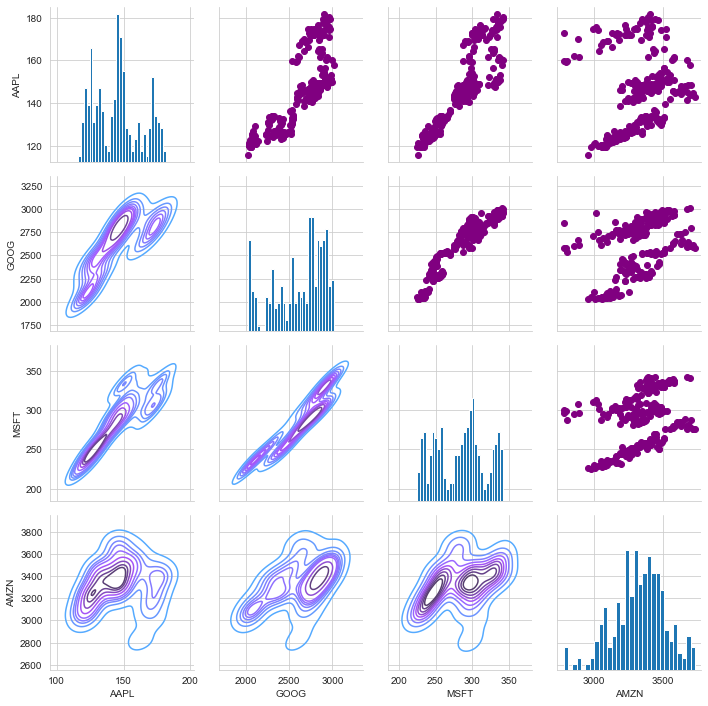

In [53]:
returns_fig=sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

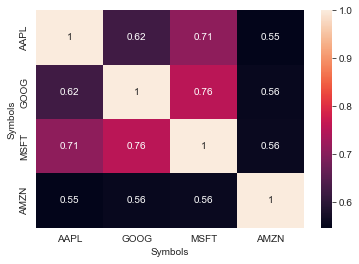

In [61]:
corr_df=tech_rets.dropna().corr()
sns.heatmap(data=corr_df,annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

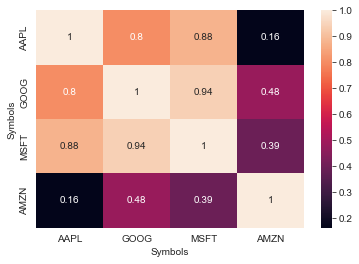

In [62]:
corr2_df=closing_df.dropna().corr()
sns.heatmap(data=corr2_df,annot=True)

In [63]:
rets=tech_rets.dropna()

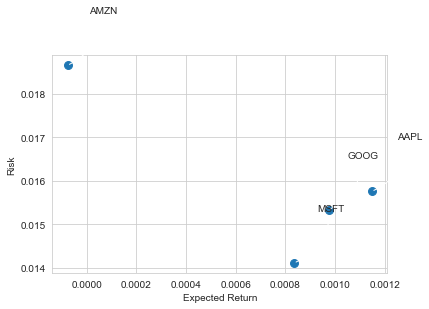

In [153]:
area=np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(50,50),
        textcoords='offset points',ha='right',va='bottom',
        arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3'))


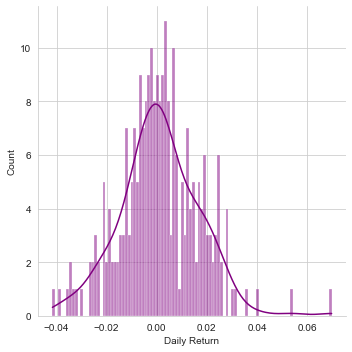

In [78]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple',kde=True)

In [79]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-02-22,-0.029799,-0.017257,-0.026808,-0.021281
2021-02-23,-0.001111,0.002896,-0.005288,0.004326
2021-02-24,-0.004052,0.011739,0.005487,-0.010947
2021-02-25,-0.034783,-0.030456,-0.023705,-0.032400
2021-02-26,0.002232,0.002708,0.014804,0.011700


In [80]:
rets['AAPL'].quantile(0.05)
#The 0.05 empirical quantile of daily returns is at -0.024.That means 95% confidence,our worst daily loss will not exceed 2.4%

-0.024738772740814662

In [144]:
days=365
dt=1/days
mu=rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [148]:
def stock_monte(start_price,days,mu,sigma):
    
    price=np.zeros(days)
    price[0]=start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
    
        
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x]=mu*dt
        
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    
    return price




In [149]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-19,2130.530029,2097.409912,2119.270020,2101.139893,1457400,2101.139893
2021-02-22,2091.419922,2062.139893,2067.000000,2064.879883,1367500,2064.879883
2021-02-23,2082.010010,2002.020020,2025.010010,2070.860107,1667400,2070.860107
2021-02-24,2100.780029,2038.130005,2041.829956,2095.169922,1248300,2095.169922
2021-02-25,2094.879883,2021.290039,2067.449951,2031.359985,1828400,2031.359985


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

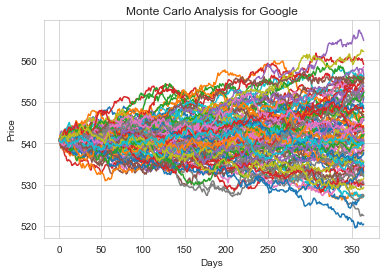

In [151]:
start_price=540.74


for run in range(100):
    plt.plot(stock_monte(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [155]:
runs =10000
simulations=np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monte(start_price,days,mu,sigma)[days-1]

In [156]:
q= np.percentile(simulations,1)

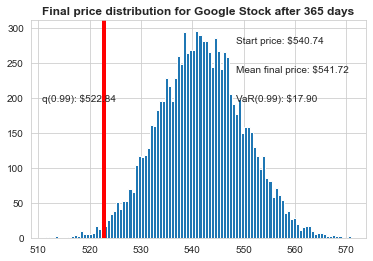

In [161]:
plt.hist(simulations,bins=100)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');